In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import fiftyone as fo

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#ds.delete()

### Creating a new datasets

In [3]:
# create a new dataset
ds = fo.Dataset("toy-dataset")

ds

Name:        toy-dataset
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)

### Create a new sample

In [4]:
image_path = "data/images/pic01.jpg"

sample = fo.Sample(filepath=image_path)
sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git_vmirly/udemy-image-recognition/section1/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
}>

In [5]:
sample["tags"].append("train")
sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git_vmirly/udemy-image-recognition/section1/data/images/pic01.jpg',
    'tags': ['train'],
    'metadata': None,
}>

### Adding annotations to a sample

In [6]:
import json

annot_file = "data/annotations/pic01.json"
with open(annot_file, "rt") as f:
    annot = json.load(f)

annot

{'filename': 'pic01.jpg',
 'width': 1024,
 'height': 1024,
 'results': [{'label': 'bird',
   'polygon': 'POLYGON ((0.6021246709747531 0.2616609757421573, 0.6336413209666665 0.2293362065196821, 0.6894015478754362 0.1808490526859693, 0.7734459478538718 0.1210482296243901, 0.832438651684889 0.1210482296243901, 0.8081950747680325 0.1832734103776549, 0.8938557132075919 0.1444836873106846, 0.9496159401163617 0.1315537796216946, 0.9665089899497047 0.1325711063239389, 0.9693934825436223 0.1405835857514881, 0.9514455286259123 0.1582110404920963, 0.9572145138137477 0.1639800256799317, 0.9488815352090965 0.1790434870037242, 0.9315745796455902 0.190901956556497, 0.9360615681250178 0.1963504425672304, 0.9267670919890607 0.2082089121200033, 0.9088191380713505 0.2197468824956741, 0.9088191380713505 0.2290413586316312, 0.8918326816849462 0.2389768331217921, 0.8972811676956796 0.2421818248928118, 0.8908711841536403 0.2511558018516669, 0.8774102187153576 0.260770777164726, 0.8652312499854828 0.265578264

In [7]:
fo.Classification(label=annot["results"][0]["label"])

<Classification: {
    'id': '6678c1503e1de2f35d24bc6c',
    'tags': [],
    'label': 'bird',
    'confidence': None,
    'logits': None,
}>

In [8]:
fo.Classifications(
    classifications=[fo.Classification(label=annot["results"][0]["label"])]
)

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678c1513e1de2f35d24bc6d',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

In [9]:
sample["ground_truth"] = fo.Classifications(
    classifications=[fo.Classification(label=annot["results"][0]["label"])]
)

sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git_vmirly/udemy-image-recognition/section1/data/images/pic01.jpg',
    'tags': ['train'],
    'metadata': None,
    'ground_truth': <Classifications: {
        'classifications': [
            <Classification: {
                'id': '6678c1523e1de2f35d24bc6e',
                'tags': [],
                'label': 'bird',
                'confidence': None,
                'logits': None,
            }>,
        ],
        'logits': None,
    }>,
}>

In [10]:
sample.ground_truth

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678c1523e1de2f35d24bc6e',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

In [11]:
sample["ground_truth"]

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6678c1523e1de2f35d24bc6e',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

### Adding samples to dataset

In [12]:
images_dir = "data/images/"
annots_dir = "data/annotations/"

for filename in os.listdir(images_dir):
    if not filename.endswith(".jpg"):
        continue
    img_path = os.path.join(images_dir, filename)
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))
    annot = json.load(open(annot_path, "rt"))

    sample = fo.Sample(img_path)
    sample["ground_truth"] = fo.Classifications(
        classifications=[fo.Classification(label=res["label"]) for res in annot["results"]]
    )

    ds.add_sample(sample)

fo.pprint(ds.stats())

{
    'samples_count': 13,
    'samples_bytes': 4663,
    'samples_size': '4.6KB',
    'total_bytes': 4663,
    'total_size': '4.6KB',
}


In [ ]:
ds

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



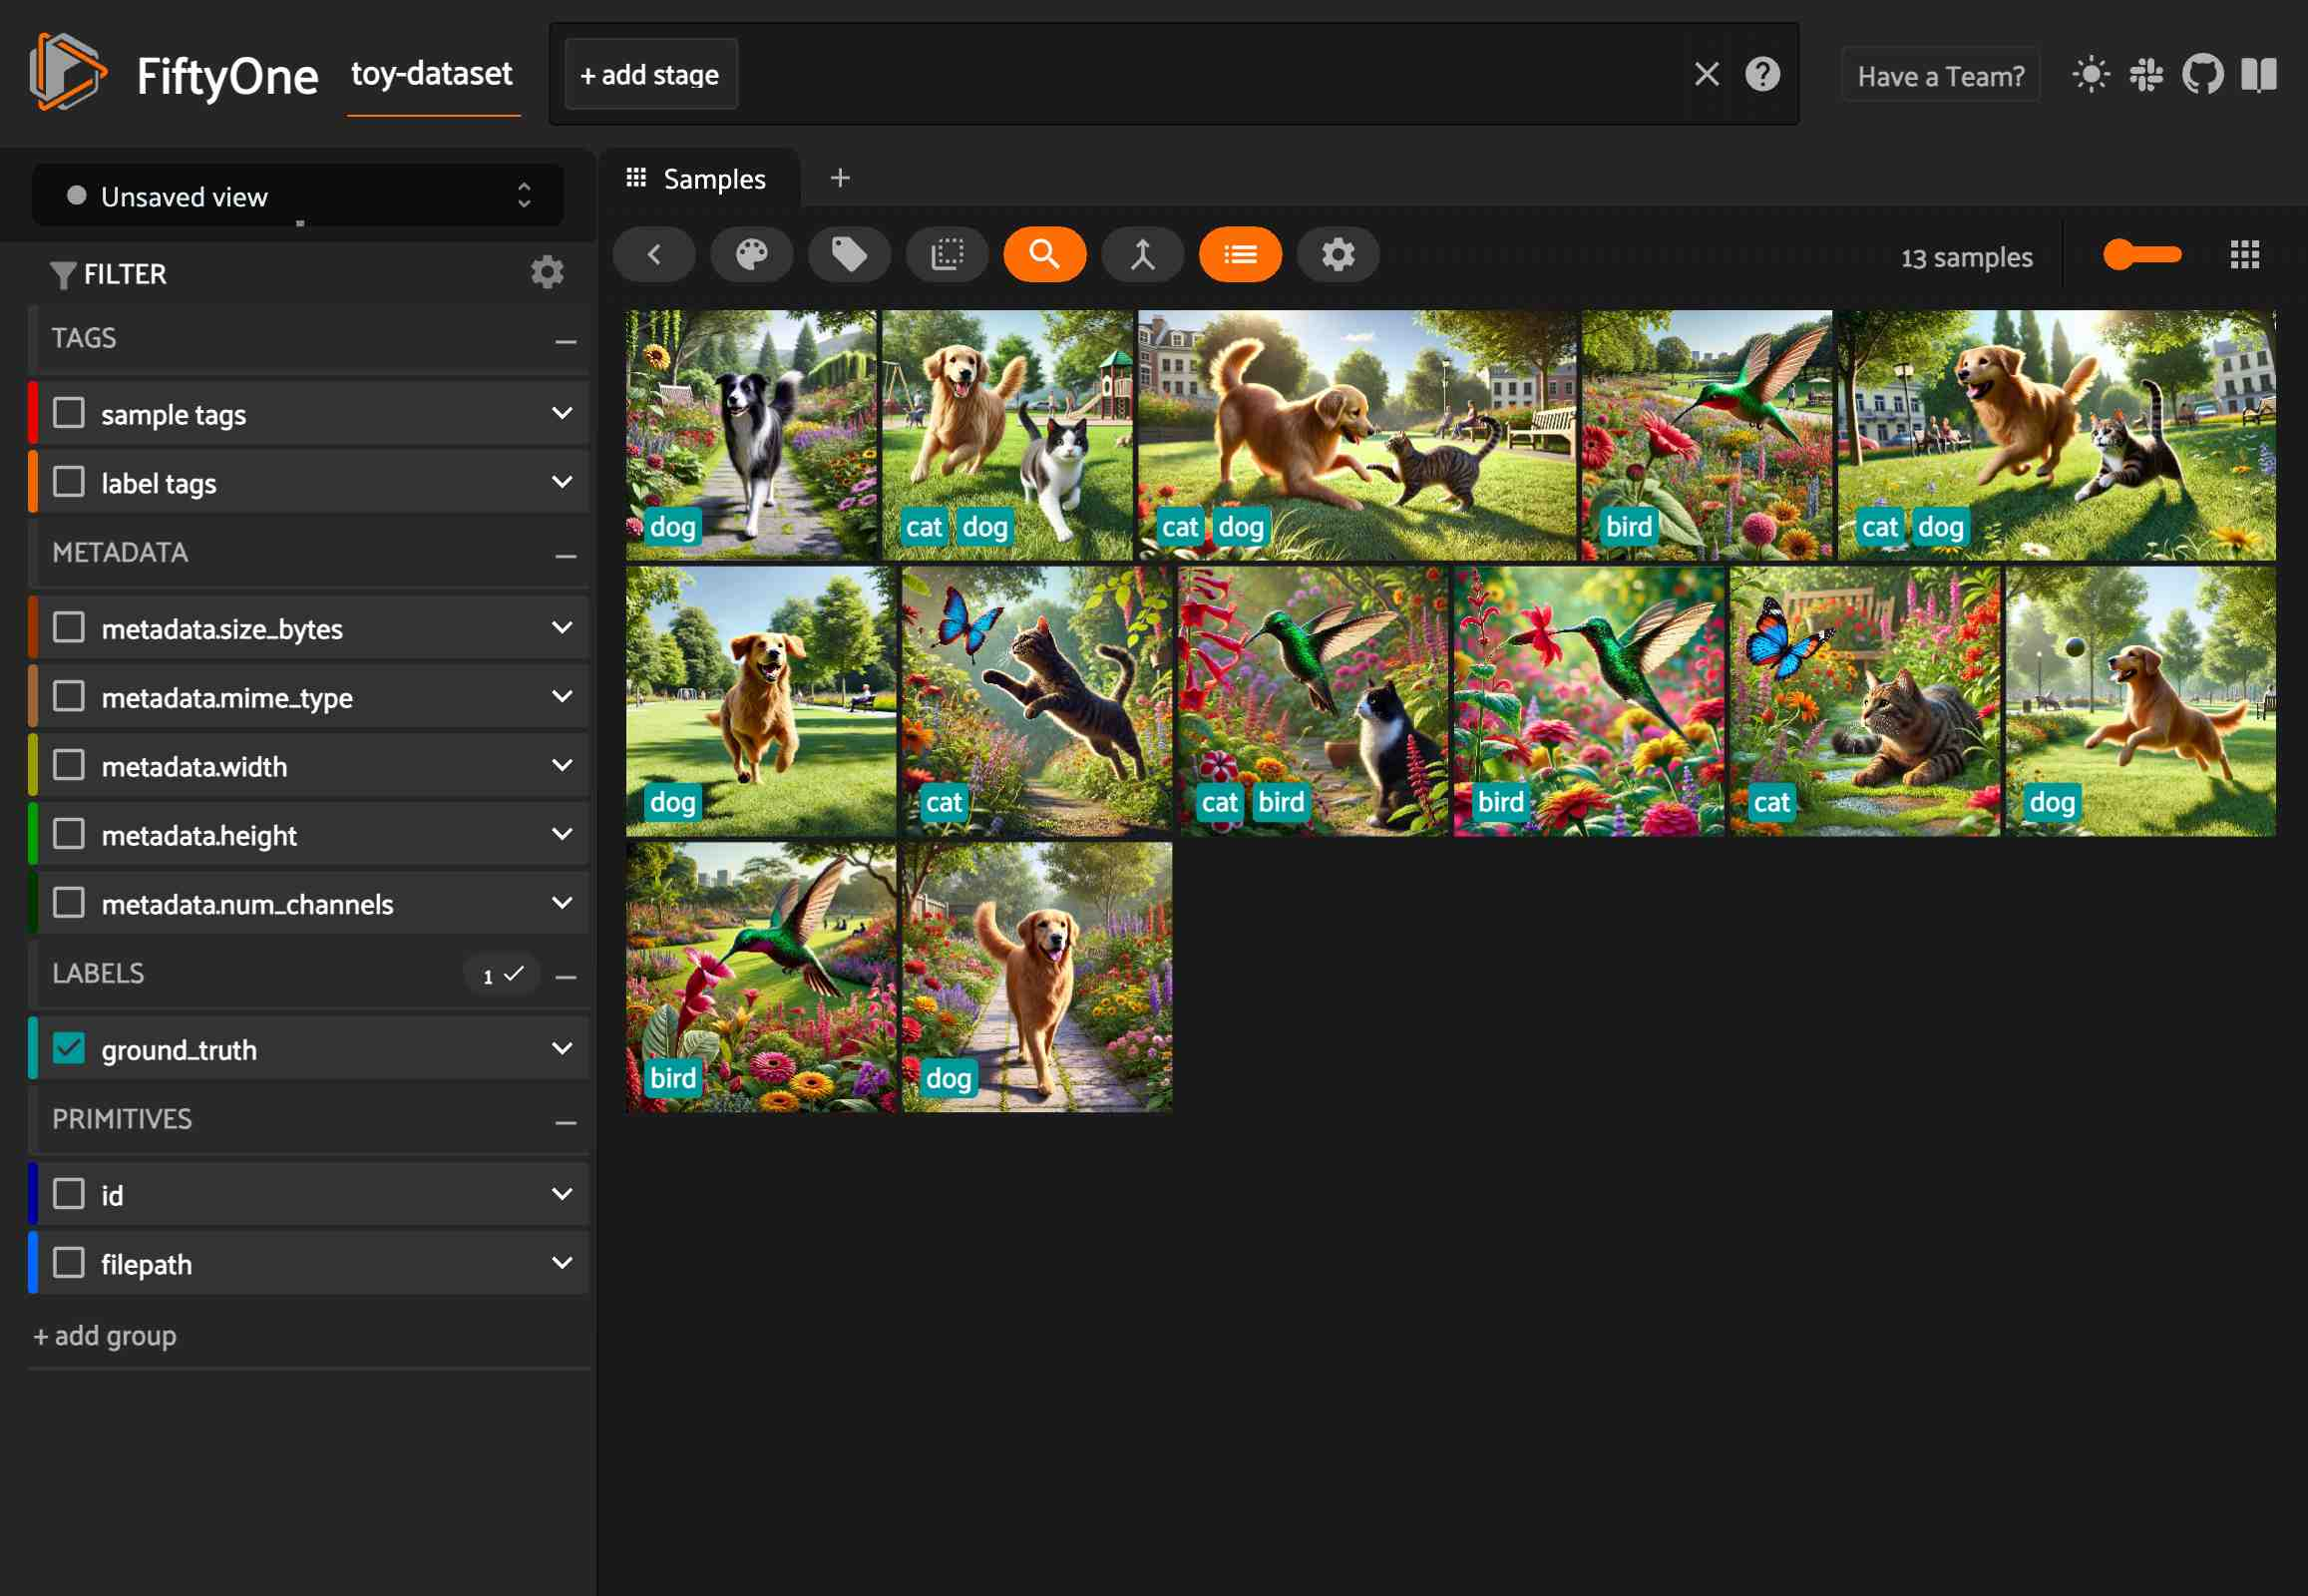

In [13]:
session = fo.launch_app(ds)

## Restart kernel and re-load the dataset

In [14]:
import fiftyone as fo

ds = fo.load_dataset("toy-dataset")

fo.pprint(ds.stats())

{
    'samples_count': 13,
    'samples_bytes': 4663,
    'samples_size': '4.6KB',
    'total_bytes': 4663,
    'total_size': '4.6KB',
}


## Adding bounding-boxes to samples

In [21]:
fo.load_dataset("detection-dataset").delete()

In [22]:
import os
import json
from shapely import wkt
import fiftyone as fo

images_dir = "data/images"
annots_dir = "data/annotations/"


ds = fo.Dataset.from_images_dir(
    images_dir,
    name="detection-dataset"
)

fo.pprint(ds.stats())

for sample in ds:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    detections = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        x1, y1, x2, y2 = polygon.bounds
        det = fo.Detection(
            label=res["label"],
            bounding_box=(x1, y1, x2-x1, y2-y1)  # fmt: xywh
        )
        detections.append(det)

    sample["ground_truth"] = fo.Detections(detections=detections)

    # save the sample to dataset
    sample.save()


 100% |███████████████████| 13/13 [15.5ms elapsed, 0s remaining, 839.5 samples/s]     
{
    'samples_count': 13,
    'samples_bytes': 2496,
    'samples_size': '2.4KB',
    'total_bytes': 2496,
    'total_size': '2.4KB',
}



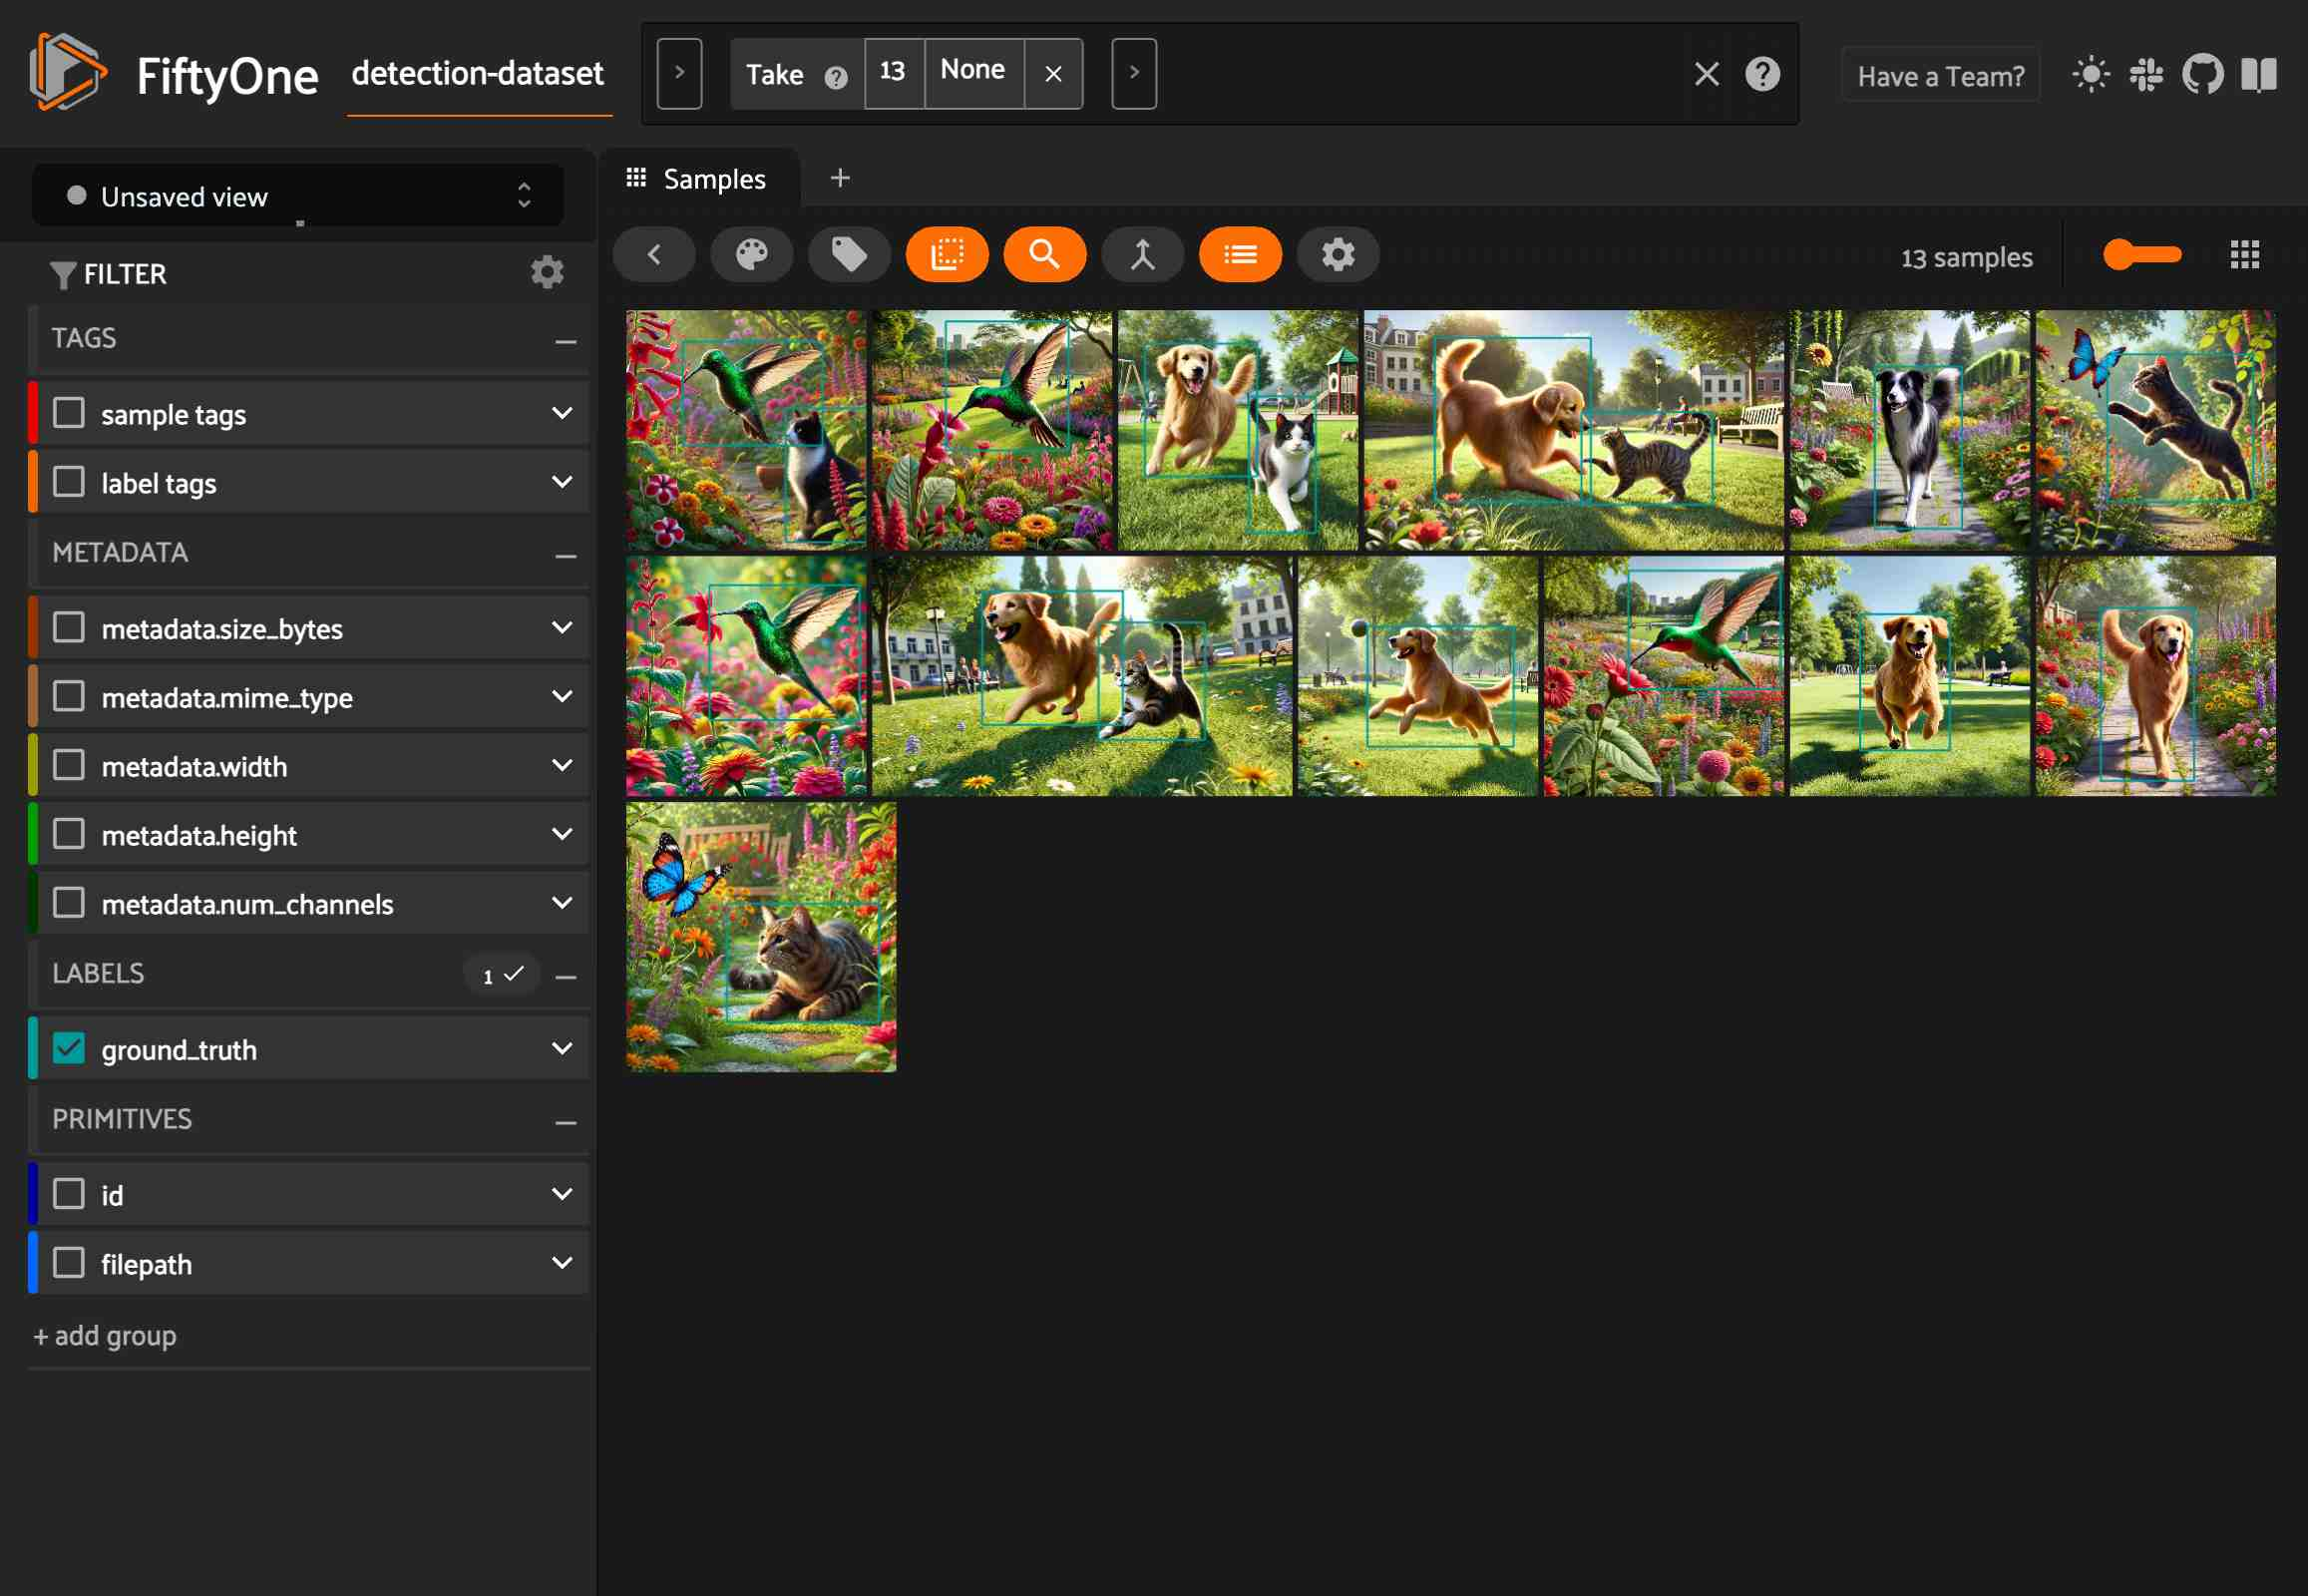

In [23]:
session.view = ds.take(len(ds))

## Adding polygons to samples for instance segmentation

In [25]:
import os
import json
from shapely import wkt
import fiftyone as fo

images_dir = "data/images"
annots_dir = "data/annotations/"

ds3 = fo.Dataset.from_images_dir(images_dir)

for sample in ds3:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    polylines = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        poly = fo.Polyline(
            label=res["label"],
            points=[list(polygon.exterior.coords)],  #List[List[(x, y)]]
            closed=True
        )
        polylines.append(poly)

    sample["ground_truth"] = fo.Polylines(polylines=polylines)

    # save the sample to dataset
    sample.save()


 100% |███████████████████| 13/13 [14.9ms elapsed, 0s remaining, 872.2 samples/s]     



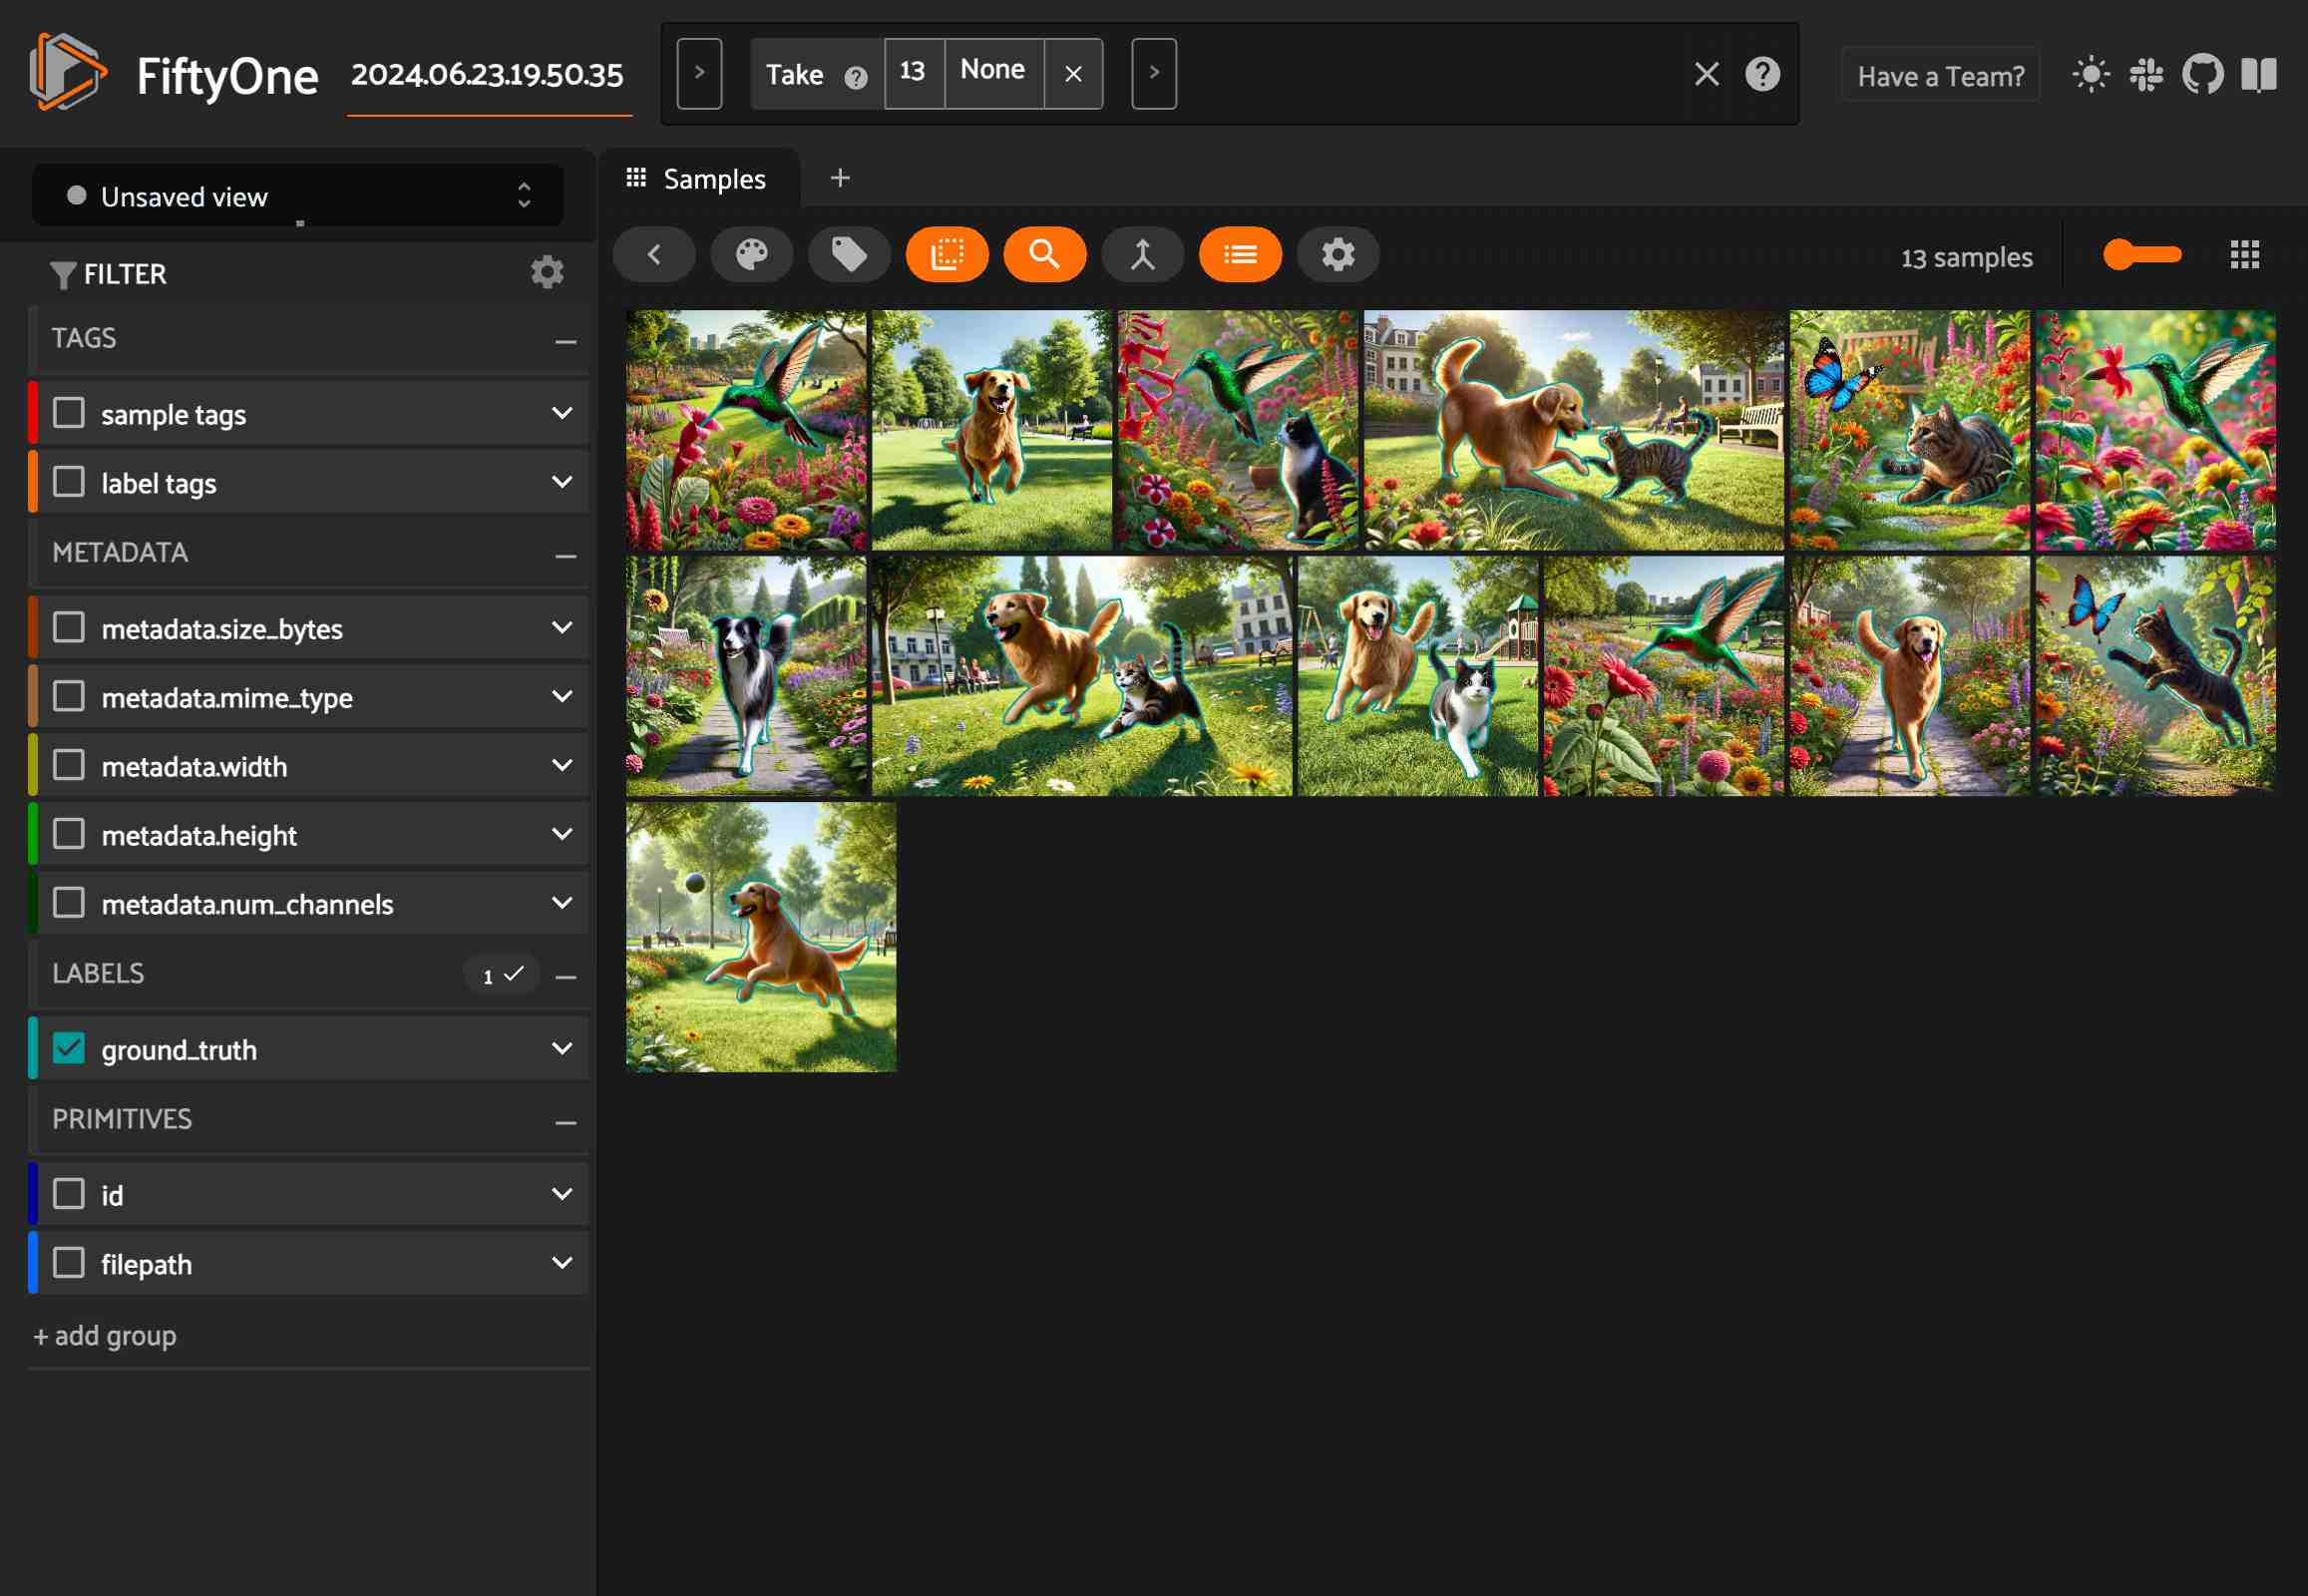

In [26]:
session.view = ds3.take(len(ds3))

### Selecting subset of the dataset

9



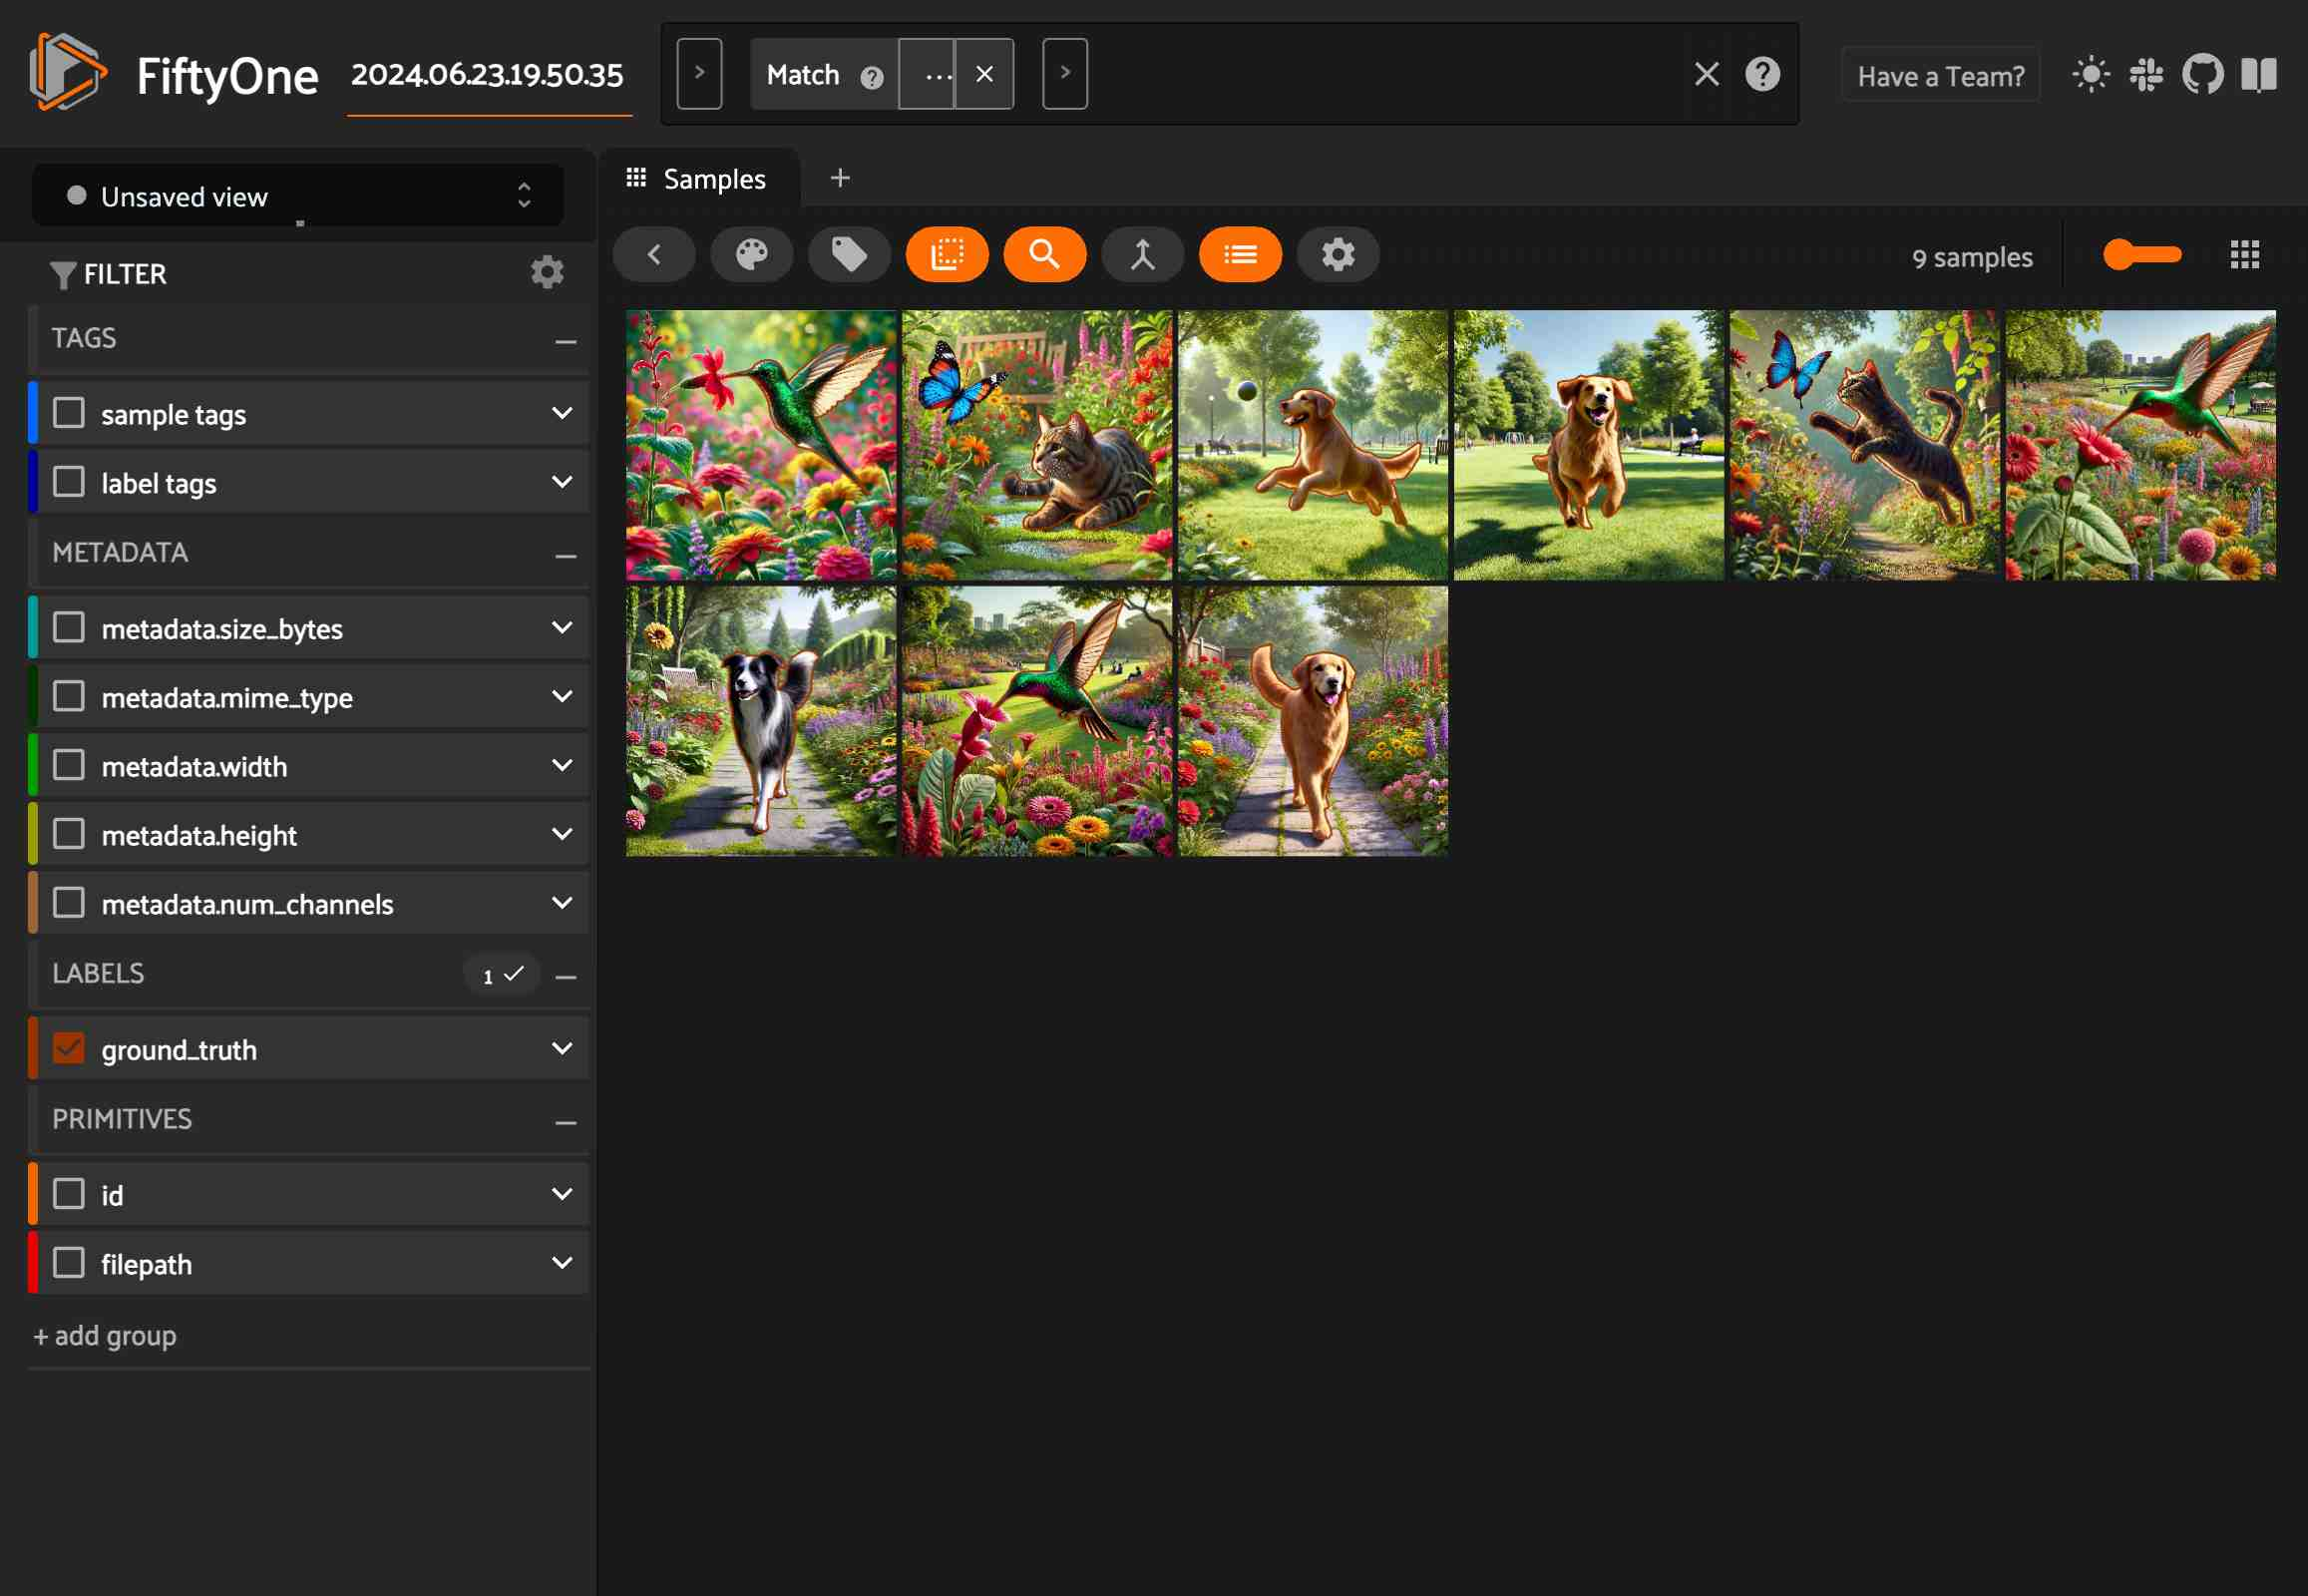

In [32]:
from fiftyone import ViewField as F

view = ds3.match(F("ground_truth.polylines").length() == 1)
print(len(view))

session.view = view

4



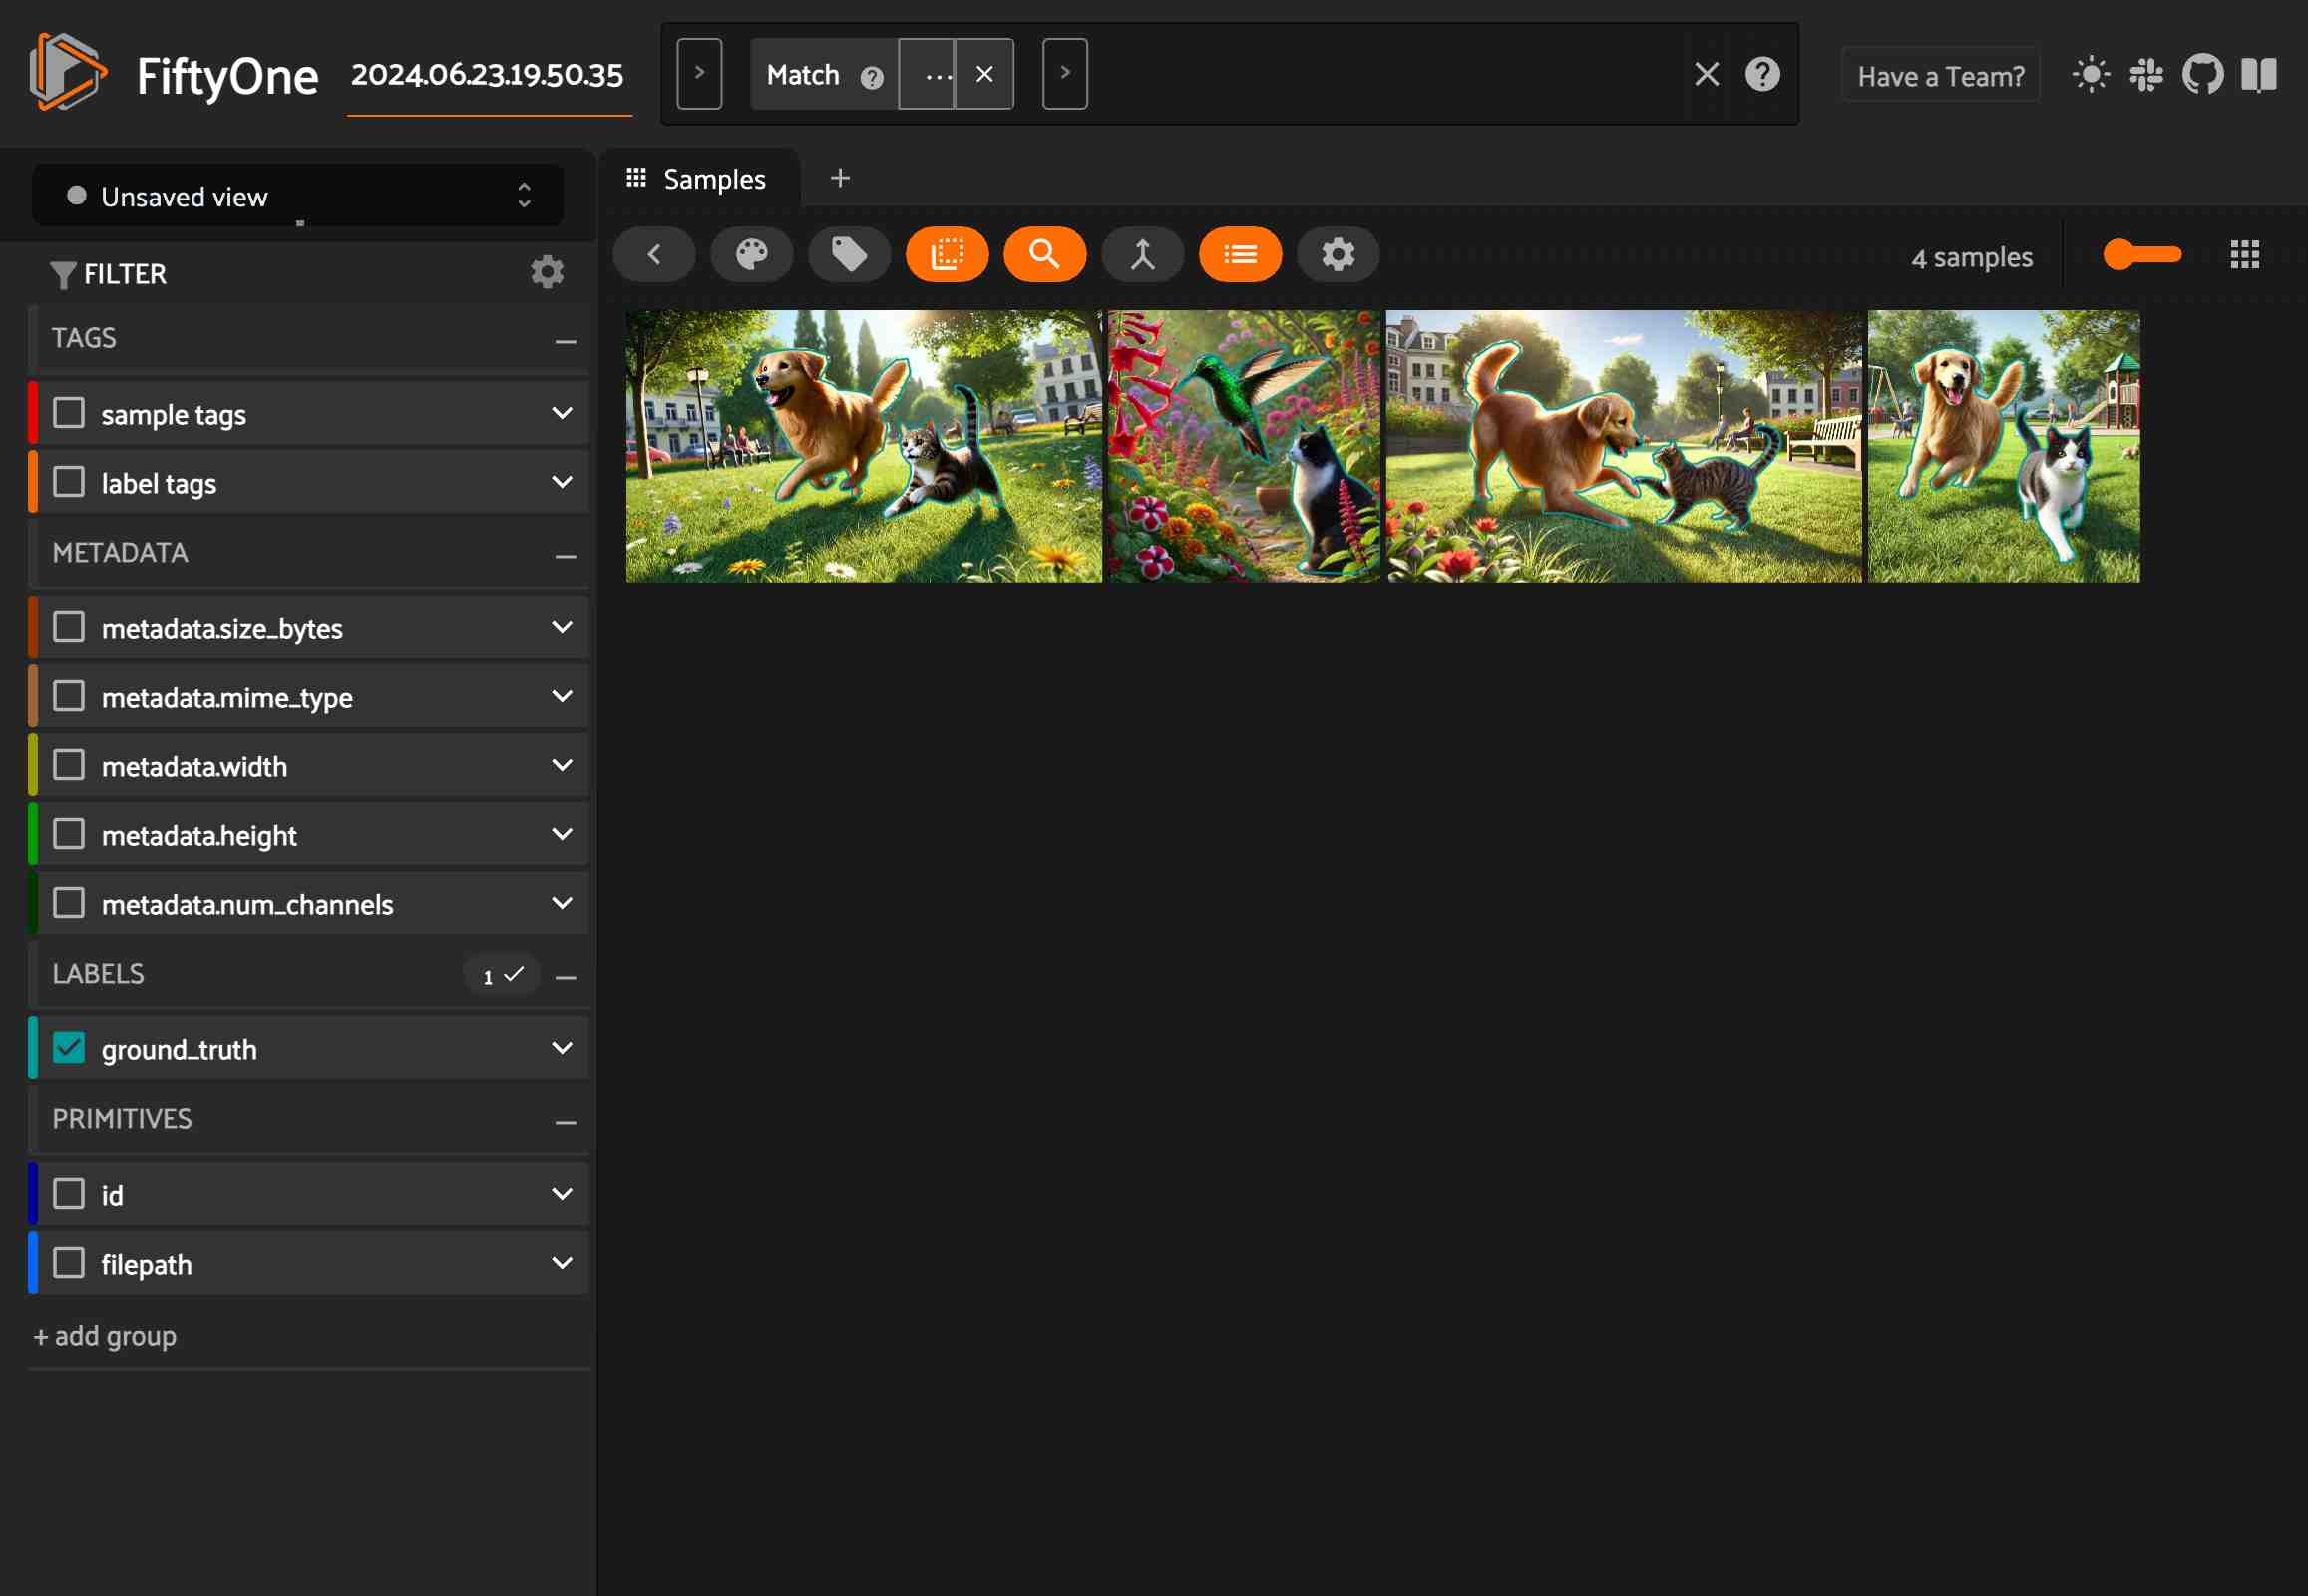

In [33]:
from fiftyone import ViewField as F

view = ds3.match(F("ground_truth.polylines").length() > 1)
print(len(view))

session.view = view

In [39]:
view = ds3.filter_labels(
    "ground_truth",
    F("label").is_in(["cat", "dog"])
)
view

Dataset:     2024.06.23.19.50.35
Media type:  image
Num samples: 10
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
View stages:
    1. FilterLabels(field='ground_truth', filter={'$in': ['$$this.label', [...]]}, only_matches=True, trajectories=False)

In [ ]:
session.view = view